In [609]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

In [610]:
house_data = pd.read_excel("/Users/sahityaraipura/Desktop/House_Data.xlsx", sheetname = "Sheet 1")
house_data.head()

/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [611]:
house_data.rename({'X1 transaction date': 'X1', 'X2 house age': 'X2', 'X3 distance to the nearest MRT station': 'X3', 'X4 number of convenience stores': 'X4', 'X5 latitude': 'X5', 'X6 longitude': 'X6', 'Y house price of unit area': 'Y'}, axis=1, inplace=True)

house_data.head()


,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [612]:
house_data.shape

(414, 8)

In [613]:
list(house_data.columns.values)

['No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y']

In [614]:
house_data.describe()

,No,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


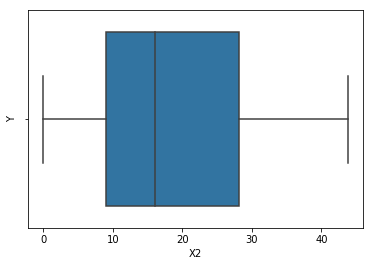

In [615]:
sns.scatterplot(x=house_data['X2'], y=house_data['Y'])
sns.boxplot(x=house_data['X2'])

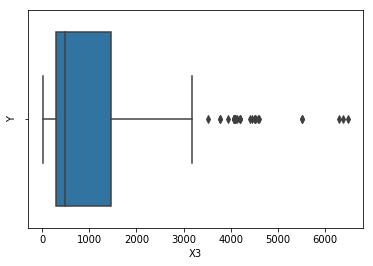

In [616]:
sns.scatterplot(x=house_data['X3'], y=house_data['Y'])
sns.boxplot(x=house_data['X3'])



1083.8856889130436


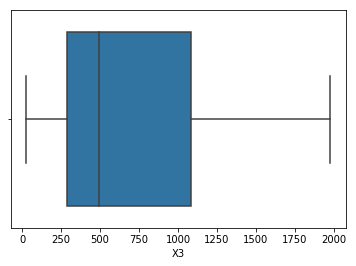

In [617]:
mean_X3 = house_data['X3'].mean(skipna=True)
print(mean_X3)

house_data['X3'] = house_data.X3.mask(house_data.X3 > 2000, mean_X3)

sns.boxplot(x=house_data['X3'])

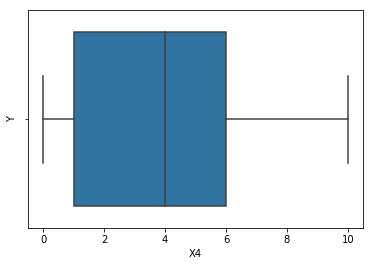

In [618]:
sns.scatterplot(x=house_data['X4'], y=house_data['Y'])
sns.boxplot(x=house_data['X4'])

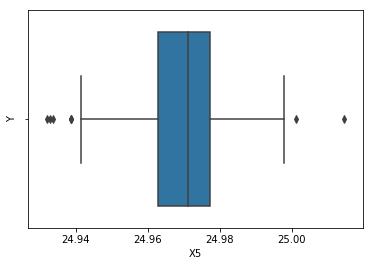

In [619]:
sns.scatterplot(x=house_data['X5'], y=house_data['Y'])
sns.boxplot(x=house_data['X5'])

In [620]:
#mean_X5 = house_data['X5'].mean(skipna=True)
#print(mean_X5)

#house_data['X5'] = house_data.X5.mask(house_data.X5 > 24.99, mean_X5)
#house_data['X5'] = house_data.X5.mask(house_data.X5 < 24.95, mean_X5)

#sns.boxplot(x=house_data['X5'])

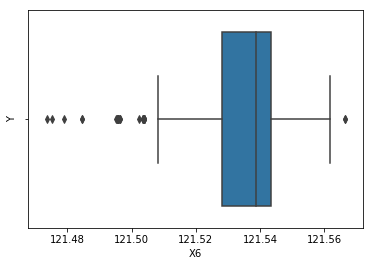

In [621]:
sns.scatterplot(x=house_data['X6'], y=house_data['Y'])
sns.boxplot(x=house_data['X6'])

In [622]:
#mean_X6 = house_data['X6'].mean(skipna=True)
#print(mean_X6)

#house_data['X6'] = house_data.X6.mask(house_data.X6 <= 121.50, mean_X6)

#sns.boxplot(x=house_data['X6'])

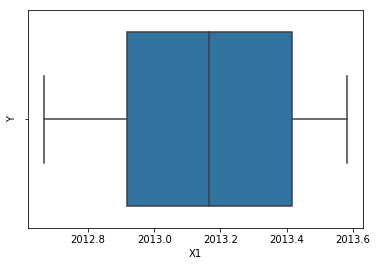

In [623]:
sns.scatterplot(x=house_data['X1'], y=house_data['Y'])
sns.boxplot(x=house_data['X1'])

In [624]:
house_data = house_data.drop(270)                          

In [625]:
from sklearn.model_selection import train_test_split
x = house_data.iloc[:, 1:7].values
y = house_data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [626]:
house_data.shape

(413, 8)

In [627]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [628]:
print(linreg.intercept_)

-35755.84854571425


In [629]:
print(linreg.coef_)

[ 6.12206241e+00 -2.37720510e-01 -1.17108146e-02  6.23822801e-01
  2.96371670e+02  1.32298243e+02]


In [630]:
print(y_test)

[56.8 14.4 33.4 15.6 30.9 31.9 48.5 41.4 51.6 28.8 41.5 42.4 41.4 39.1
 53.7 36.8 31.7 55.2 39.3 44.3 53.5 25.3 25.6 51.7 45.5 34.4 31.6 28.1
 49.5 24.7 51.7 40.6 45.4 50.5 28.5 36.5 46.1 28.9 54.4 29.3 44.9 29.8
 31.1 48.  16.7 40.9 43.8 12.9 21.3 62.1 63.9 40.3 42.2 19.1 28.4 31.1
 40.1 37.5 23.9 27.7 42.3 44.3 42.6 57.4 42.2 25.7 13.2 27.  56.2 38.3
 20.8 43.1 23.1 20.9 32.5 19.  32.1 19.2 53.  38.2 46.7 24.6 36.2]


In [631]:
y_pred = linreg.predict(X_test)
print(y_pred)

[49.54210122 18.95518232 33.40973438 18.77250314 35.89258229 28.7909653
 42.7026454  36.1115327  51.22487797 33.32507542 41.41123781 39.95312764
 48.25323488 41.89763742 48.79676024 39.31655325 32.92333477 43.82814465
 39.76088608 44.28242821 50.64489761 26.44638782 28.45284423 48.23159227
 47.20410593 43.42281917 46.20317791 29.49024825 49.68528481 30.54138842
 45.09921934 36.6962355  44.36429142 41.8352469  35.10636867 43.05985992
 49.30213911 29.71685746 51.12411791 45.59189918 52.09848674 33.93252529
 30.35227194 51.74231182 19.95000983 42.04679249 42.67928497 16.89069073
 21.13187658 49.47909399 55.55643967 36.90694366 47.66995367 19.65062457
 25.95998759 28.18049155 47.90052672 41.05672934 30.78862391 28.81675525
 42.55867306 46.66902748 40.2396126  48.30647908 38.4704342  27.3575558
 14.64548722 27.02208461 47.37115734 39.56580711 30.32252001 47.22951347
 31.20790022 18.18748025 43.63768332 23.00068603 27.54917516 18.5084757
 50.20096399 42.65913762 49.28193006 24.27402684 44.02

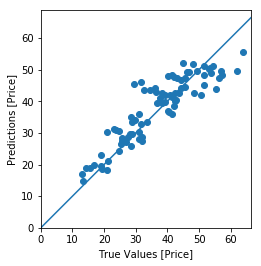

In [632]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [633]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.171811030318166

In [634]:
linreg.score(X_test,y_test)*100

80.08950945957022

In [635]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred)*100)

80.08950945957022
